#                    **supermarket_sales (2019) 📌**

# **Introduction**

**Supermarket Sales Data: This dataset records individual transactions from a supermarket chain in Myanmar, with detailed attributes for each sale. The data includes the following columns:**

* Invoice ID: Unique identifier for each transaction.
* Branch: The branch location of the supermarket (e.g., Yangon, Naypyitaw, Mandalay).
* City: The city in which the supermarket branch is located.
* Customer Type: Indicates whether the customer is a 'Member' or 'Normal'.
* Gender: Gender of the customer.
* Product Line: The category of the product sold (e.g., Health & Beauty, Electronic Accessories, Home & Lifestyle).
* Unit Price: Price per unit of the product.
* Quantity: Number of items purchased.
* Tax 5%: Calculated tax amount on the transaction at a 5% rate.
* Total: Total amount for the transaction including tax.
* Date: Date of the transaction.
* Time: Time of the transaction.
* Payment: Payment method used (e.g., Cash, Ewallet, Credit card).
* COGS: Cost of goods sold, representing the raw cost of the products.
* Gross Margin Percentage: Fixed percentage of profit for each sale (4.7619%).
* Gross Income: Profit earned from the transaction.
* Rating: Customer satisfaction rating (out of 10).


# **Libraries**

**First import all the necessary libraries that we will be used throughout the project.**
**This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:**

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score





# **Import data & Data Exploration**

**Next,load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:**

In [404]:
df = pd.read_csv("/content/supermarket_sales -.csv")

In [405]:
styled_df = df.head(10).style.set_properties(**{'background-color': '#228B22' ,'color':'Black','border-color': 'black'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "Black")]}
])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.390000,7,29.886500,627.616500,3/25/2019,18:30,Ewallet,597.730000,4.761905,29.886500,4.100000
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2/25/2019,14:36,Ewallet,413.040000,4.761905,20.652000,5.800000
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2/24/2019,11:38,Ewallet,735.600000,4.761905,36.780000,8.000000
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,1/10/2019,17:15,Credit card,72.520000,4.761905,3.626000,7.200000
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,2/20/2019,13:27,Credit card,164.520000,4.761905,8.226000,5.900000


In [406]:
df.shape

(1000, 17)

In [407]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [409]:
df.isna().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [410]:
df.duplicated().sum()

0

In [411]:
desc = pd.DataFrame(index = list(df))
desc['type'] = df.dtypes
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] /len(df) * 100
desc['null'] = df.isnull().sum()
desc['%null'] = desc['null'] / len(df) * 100
desc = pd.concat([desc,df.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'],color='green')\
    .bar(subset=['max'],color='red')\
    .bar(subset=['min'], color='pink')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
Quantity,int64,1000,10,1.000000,0,0.000000,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Unit price,float64,1000,943,94.300000,0,0.000000,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Tax 5%,float64,1000,990,99.000000,0,0.000000,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,float64,1000,990,99.000000,0,0.000000,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,float64,1000,990,99.000000,0,0.000000,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,float64,1000,1,0.100000,0,0.000000,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,float64,1000,990,99.000000,0,0.000000,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,float64,1000,61,6.100000,0,0.000000,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000
Invoice ID,object,1000,1000,100.000000,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Branch,object,1000,3,0.300000,0,0.000000,nan,nan,nan,nan,nan,nan,nan


In [412]:
for col in df.columns:
  if col not in ('Invoice ID','Date','Time') and df[col].dtype == 'object':
    print(f'{col} : {df[col].unique()}')

Branch : ['A' 'C' 'B']
City : ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type : ['Member' 'Normal']
Gender : ['Female' 'Male']
Product line : ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment : ['Ewallet' 'Cash' 'Credit card']


# **Data Cleaning**

In [413]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [414]:
df.drop('Invoice ID', axis=1, inplace=True)

In [415]:
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.day_name()
df['day'] = df['Date'].dt.day
df['hour'] = df['Time'].str.split(':').str[0].astype(int)
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year

In [416]:
df.drop('Date', axis=1, inplace=True)
df.drop('Time', axis=1, inplace=True)

# **Exploratory Data Analysis(EDA)**



In [417]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

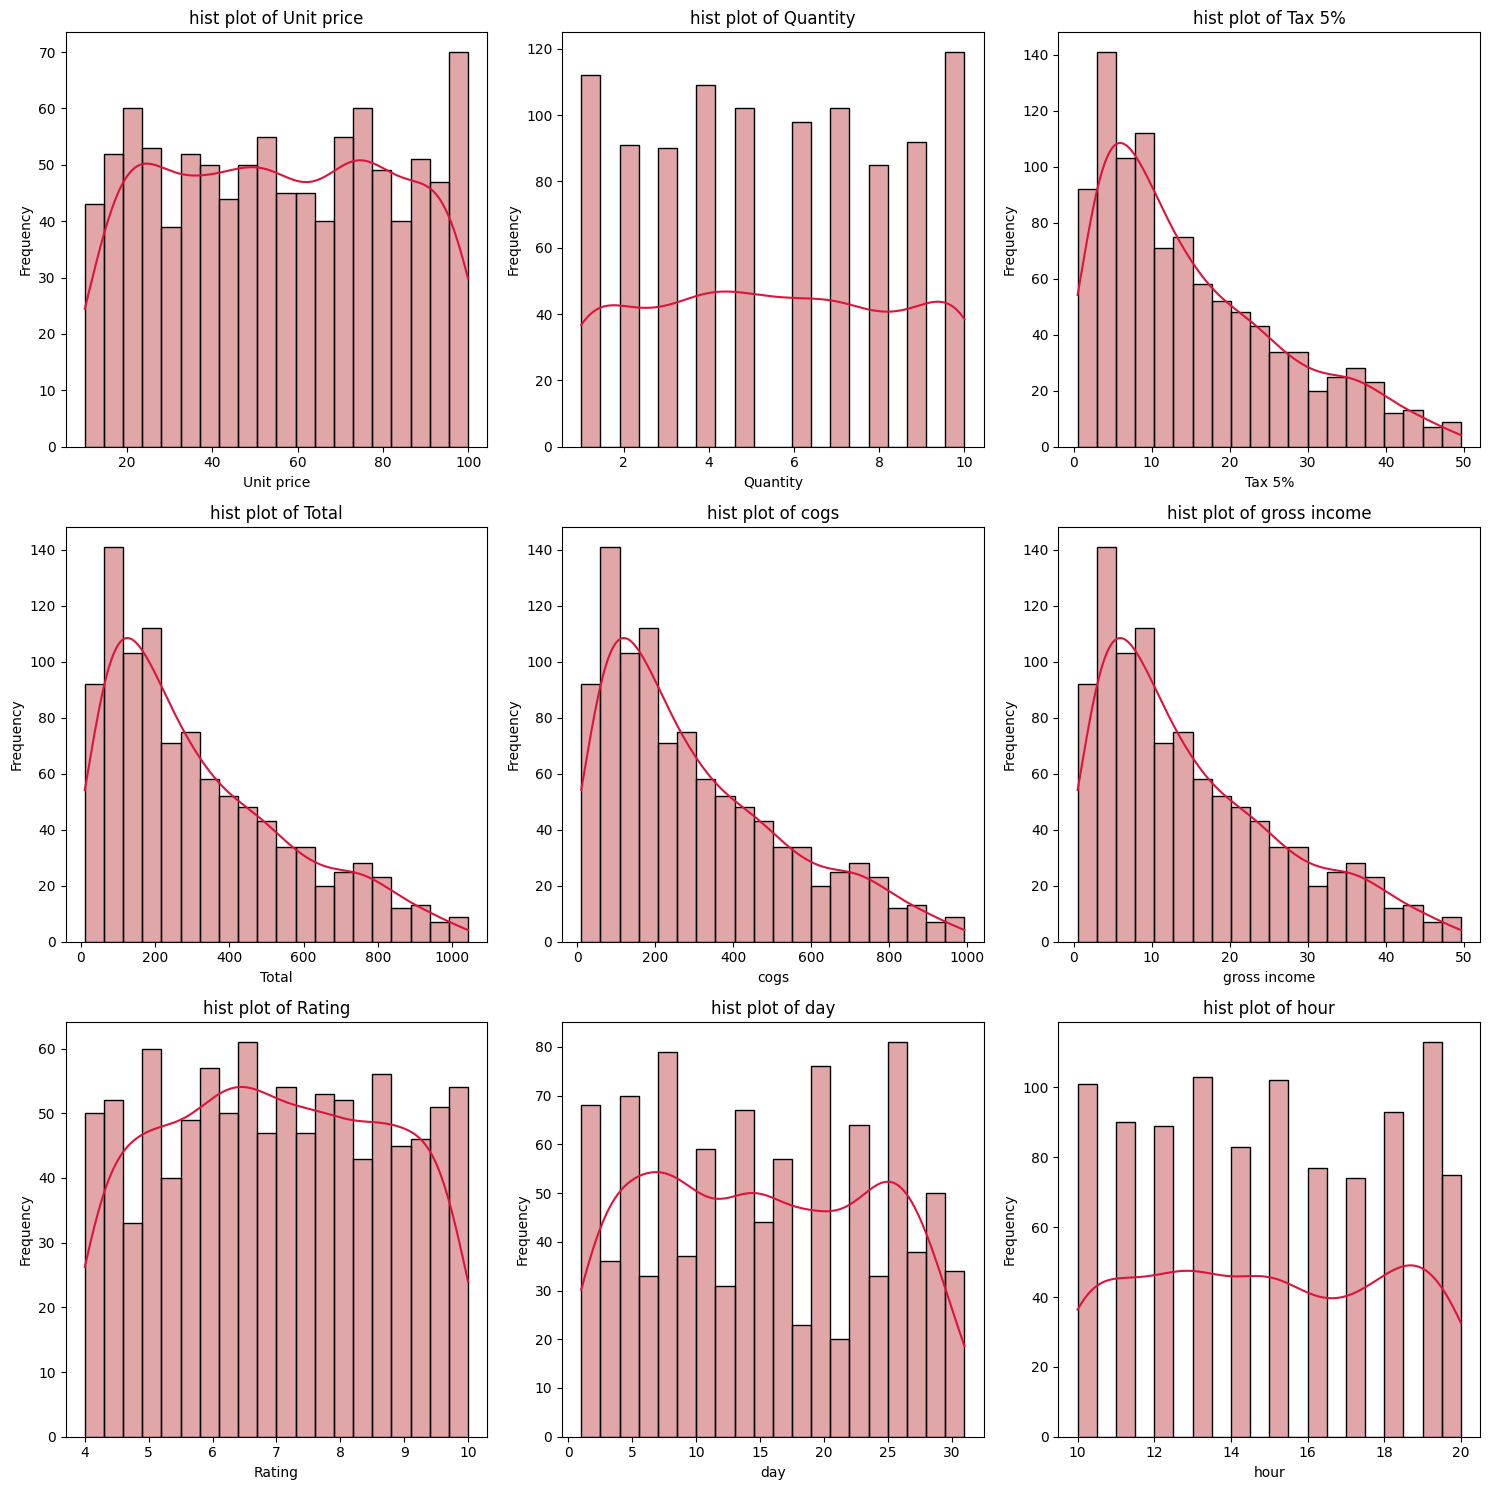

In [418]:
num_col = num_cols[~num_cols.isin(['year', 'gross margin percentage'])]
num_rows = int(np.ceil(len(num_col) / 3))
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.ravel()
for i, col in enumerate(num_col):
    ax = sns.histplot(df[col], ax=axes[i], kde=True, bins=20, color='#c44e52')
    if ax.lines and hasattr(ax.lines[0], 'set_color'):
        ax.lines[0].set_color('crimson')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'hist plot of {col}')
if len(axes) > len(num_col):
    for i in range(len(num_col), len(axes)):
        if axes[i] in fig.axes:
            fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

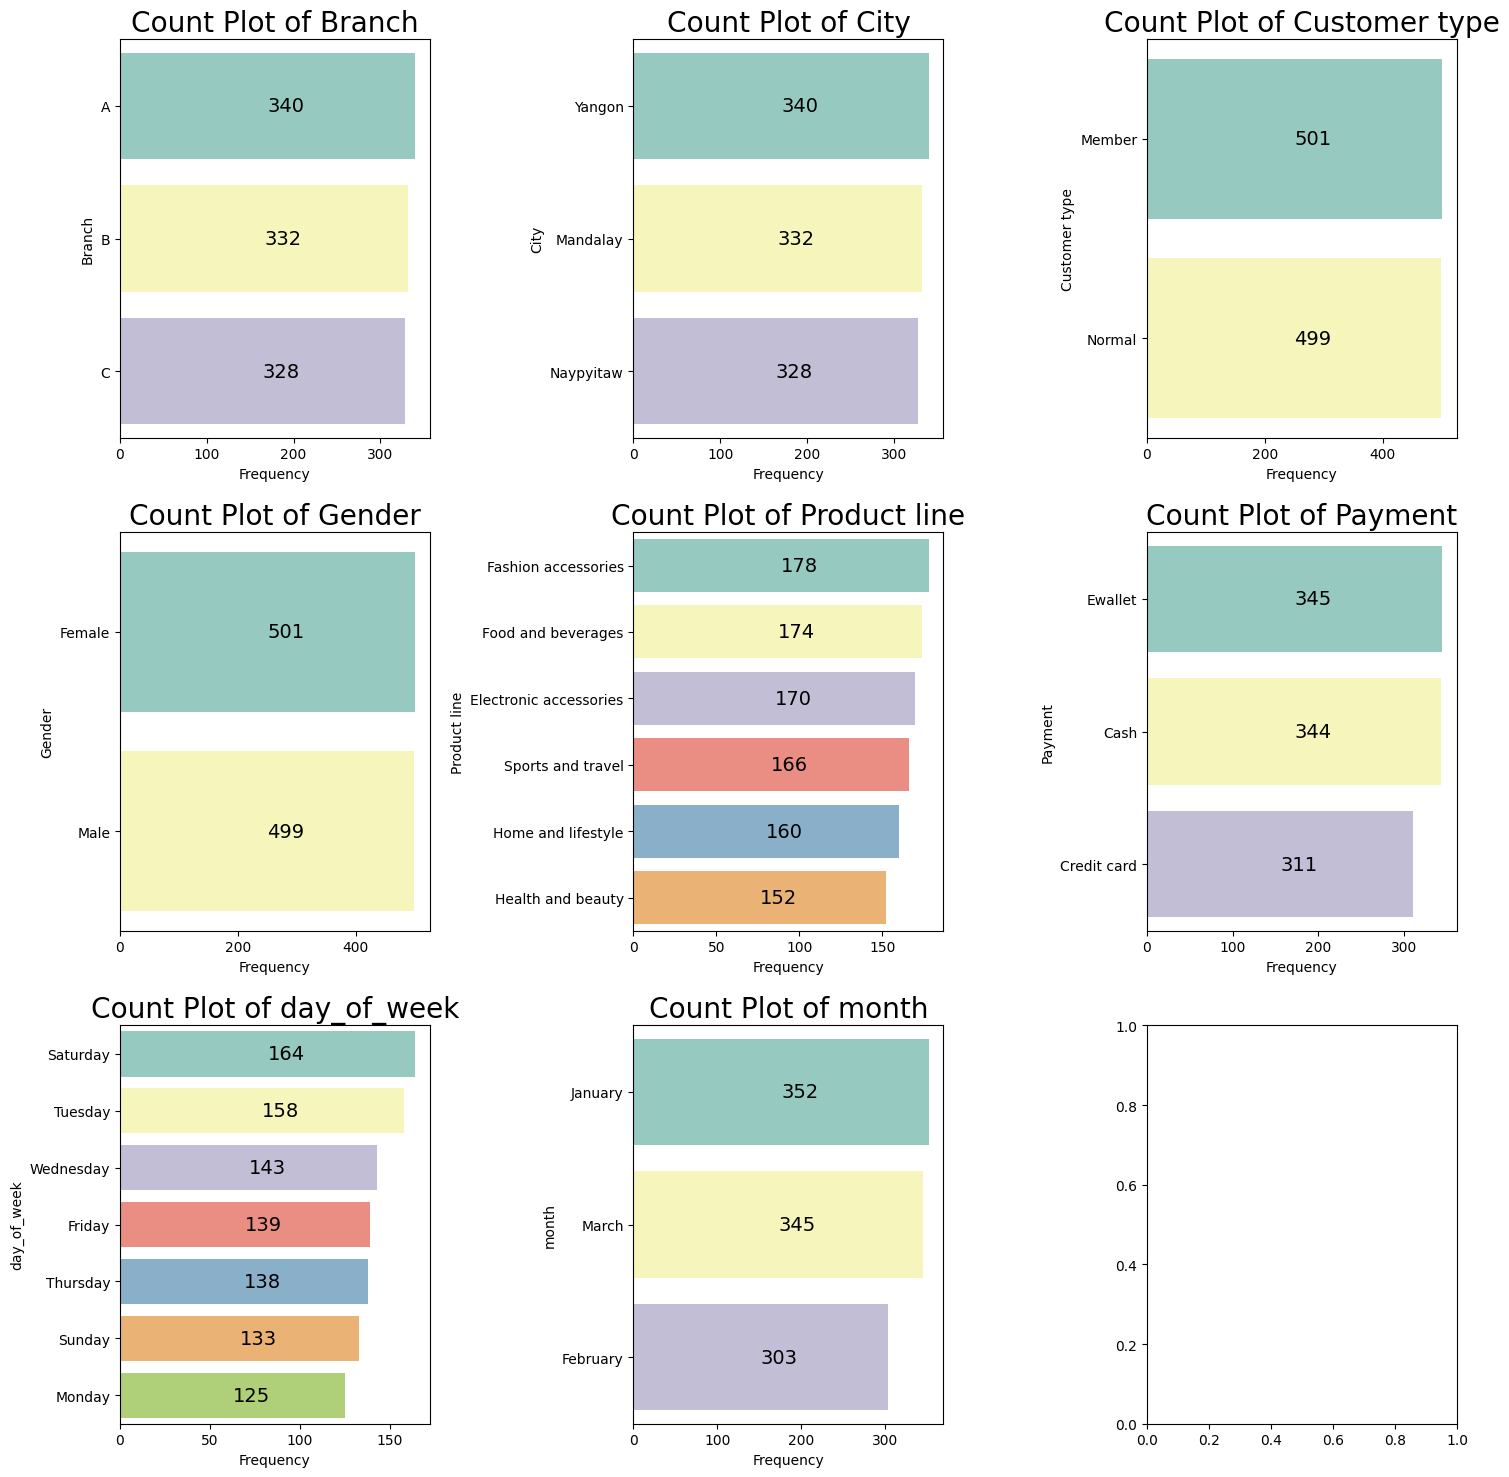

In [419]:
cat_rows = int(np.ceil(len(cat_cols) / 3))
fig, axes = plt.subplots(cat_rows, 3, figsize=(15, 5 * cat_rows))
axes = axes.ravel()
for i, col in enumerate(cat_cols):
    plt.style.use("fivethirtyeight")
    count_prim = df[col].value_counts()
    count_prim = count_prim.sort_values(ascending=False)
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, ax=axes[i], palette="Set3")
    ax.set_ylabel(col)
    ax.set_xlabel('Frequency')
    ax.set_title(f'Count Plot of {col}')
    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="left",
            va="center")
plt.tight_layout()
plt.show()

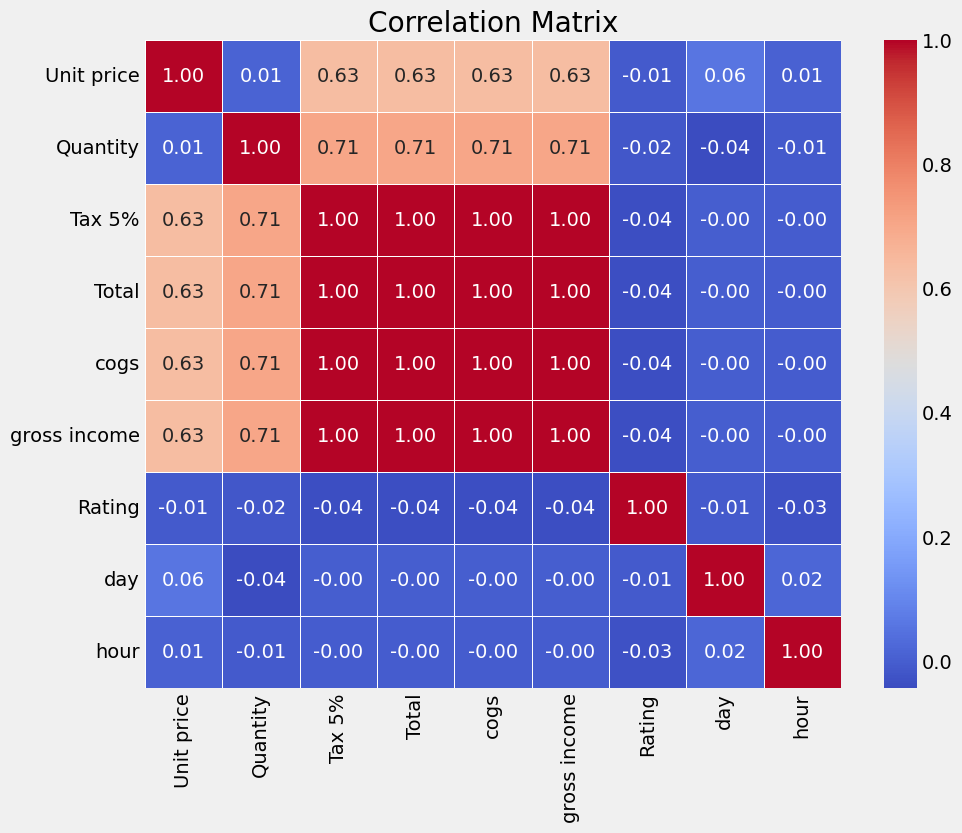

In [420]:
correlation_matrix = df[num_col].corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


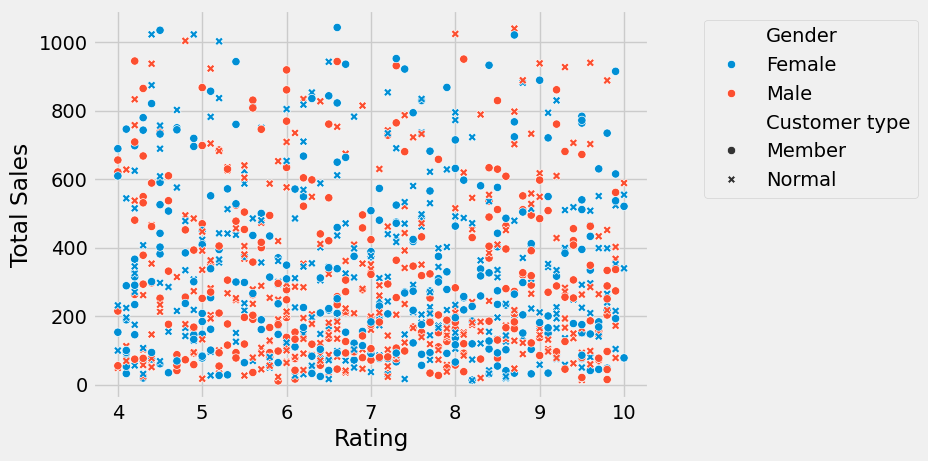

In [421]:
sns.scatterplot(data=df, y='Total', x='Rating',hue='Gender',style='Customer type')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.show()

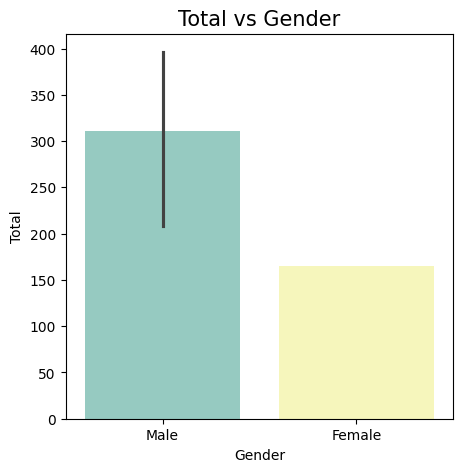

In [422]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(y="Total", x="Gender", data=df[175:180] , palette="Set3")
plt.title("Total vs Gender",fontsize=15)
plt.ylabel("Total")
plt.xlabel("Gender")
plt.show()

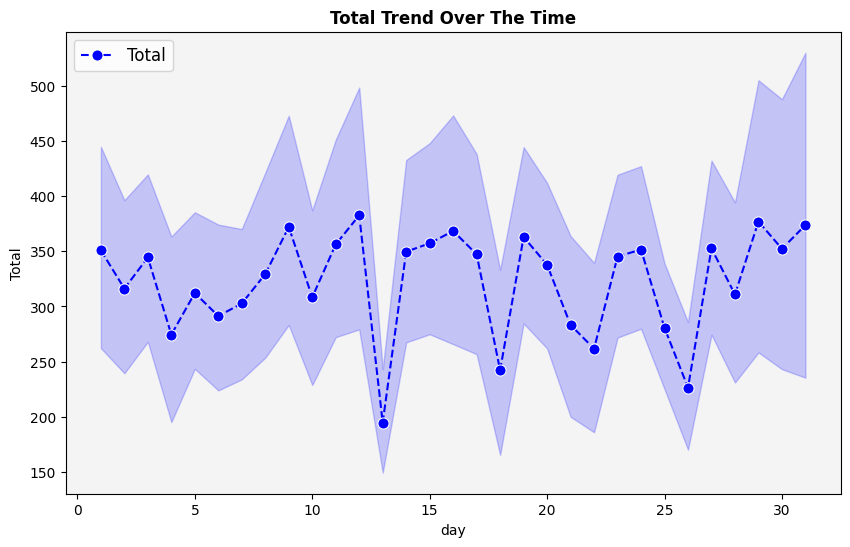

In [423]:
plt.figure(figsize = (10,6))
salary_trend = df[['Total', 'day_of_week']].sort_values(by = 'day_of_week')
p = sns.lineplot(df ,x = 'day', y = 'Total', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Total Trend Over The Time', fontsize=12, fontweight='bold')
p.set_facecolor("#f4f4f4")
plt.legend(['Total'], loc='best', fontsize=12)
p.grid(False)

plt.show()

In [424]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'day_of_week',
       'day', 'hour', 'month', 'year'],
      dtype='object')

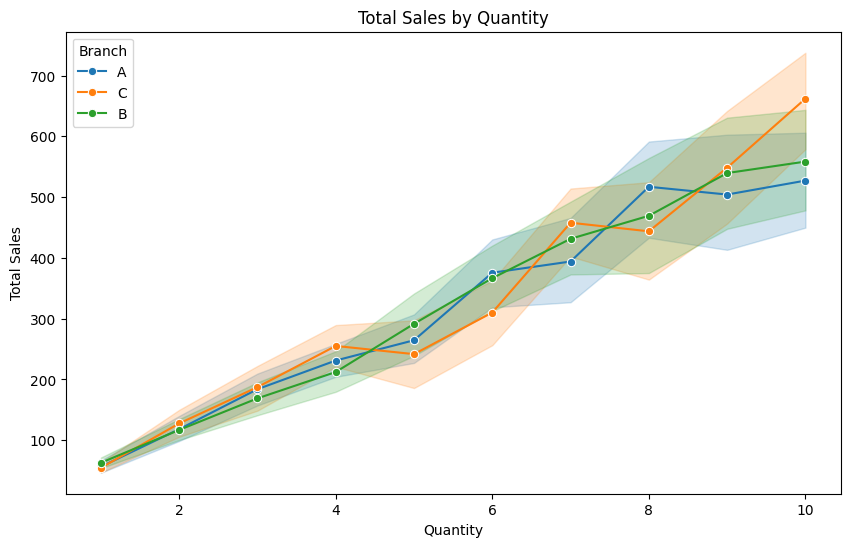

In [425]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='Quantity', y='Total', hue='Branch', marker='o')
plt.title('Total Sales by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.legend(title='Branch')
plt.show()




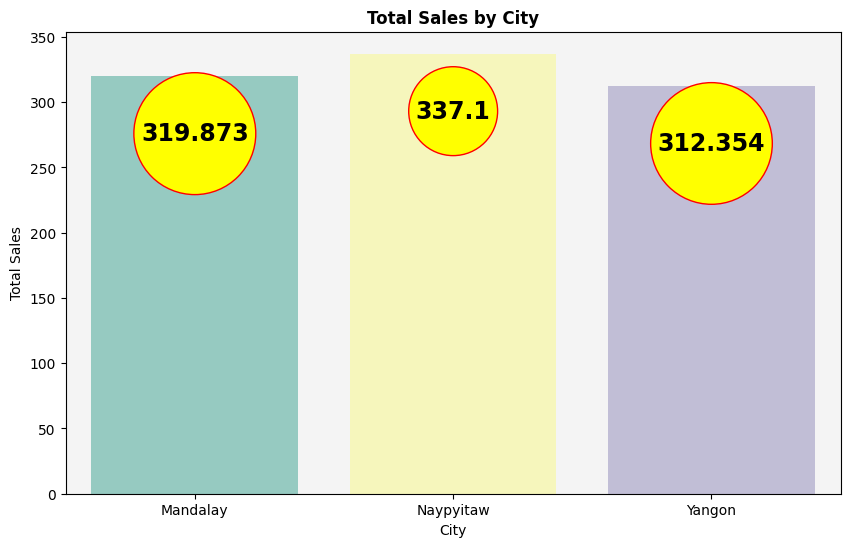

In [426]:
mean_data = df.groupby('City')['Total'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = mean_data.index, y = mean_data.values, palette = 'Set3')
plt.title('Total Sales by City', fontsize = 12, fontweight = 'bold')
plt.xlabel('City')
plt.ylabel('Total Sales')
for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'circle', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'


                )


ax.set_facecolor("#f4f4f4")


ax.grid(False)

plt.show()

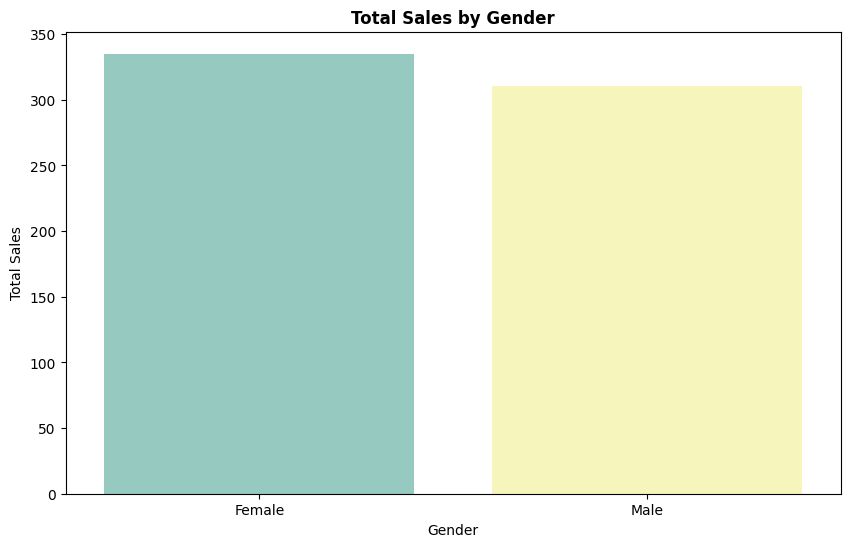

In [427]:
mean_data = df.groupby('Gender')['Total'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(x = mean_data.index, y = mean_data.values, palette = 'Set3')
plt.title('Total Sales by Gender', fontsize = 12, fontweight = 'bold')
plt.xlabel('Gender')
plt.ylabel('Total Sales')

for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'circle', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'


                )


ax.set_facecolor("#f4f4f4")


ax.grid(False)

plt.show()


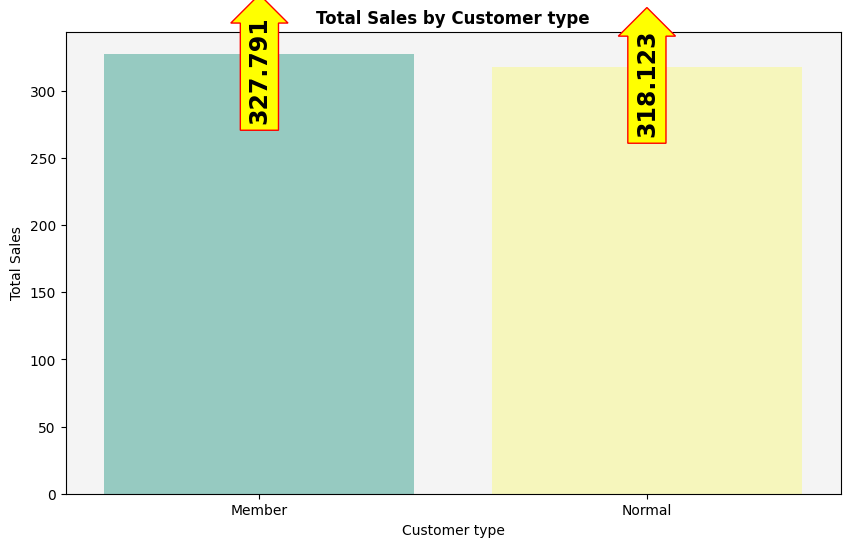

In [428]:
mean_data = df.groupby('Customer type')['Total'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = mean_data.values, x = mean_data.index, palette = 'Set3')
plt.title('Total Sales by Customer type', fontsize = 12, fontweight = 'bold')
plt.xlabel('Customer type')
plt.ylabel('Total Sales')

for container in p.containers:
    plt.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold',
                rotation = 90

                 )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)

plt.show()

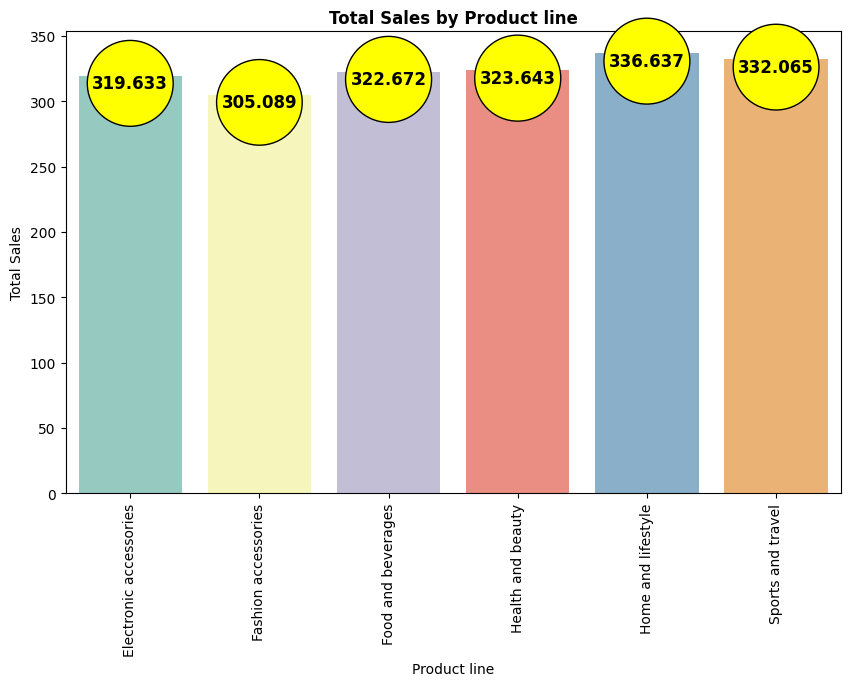

In [429]:
mean_data = df.groupby('Product line')['Total'].mean()

# Plot the average salary by company size
plt.figure(figsize=(10, 6))
p = sns.barplot(x=mean_data.index, y=mean_data.values, palette='Set3')
plt.title('Total Sales by Product line', fontsize=12, fontweight='bold')
plt.xlabel('Product line' )
plt.ylabel('Total Sales')
plt.xticks(rotation=90)


for container in p.containers:
    p.bar_label(container, fontweight = 'bold',
                padding = -12,
                fontsize=12,
                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'black'}

               )


plt.show()

# **Machine Learning**

## **Handling outliers**

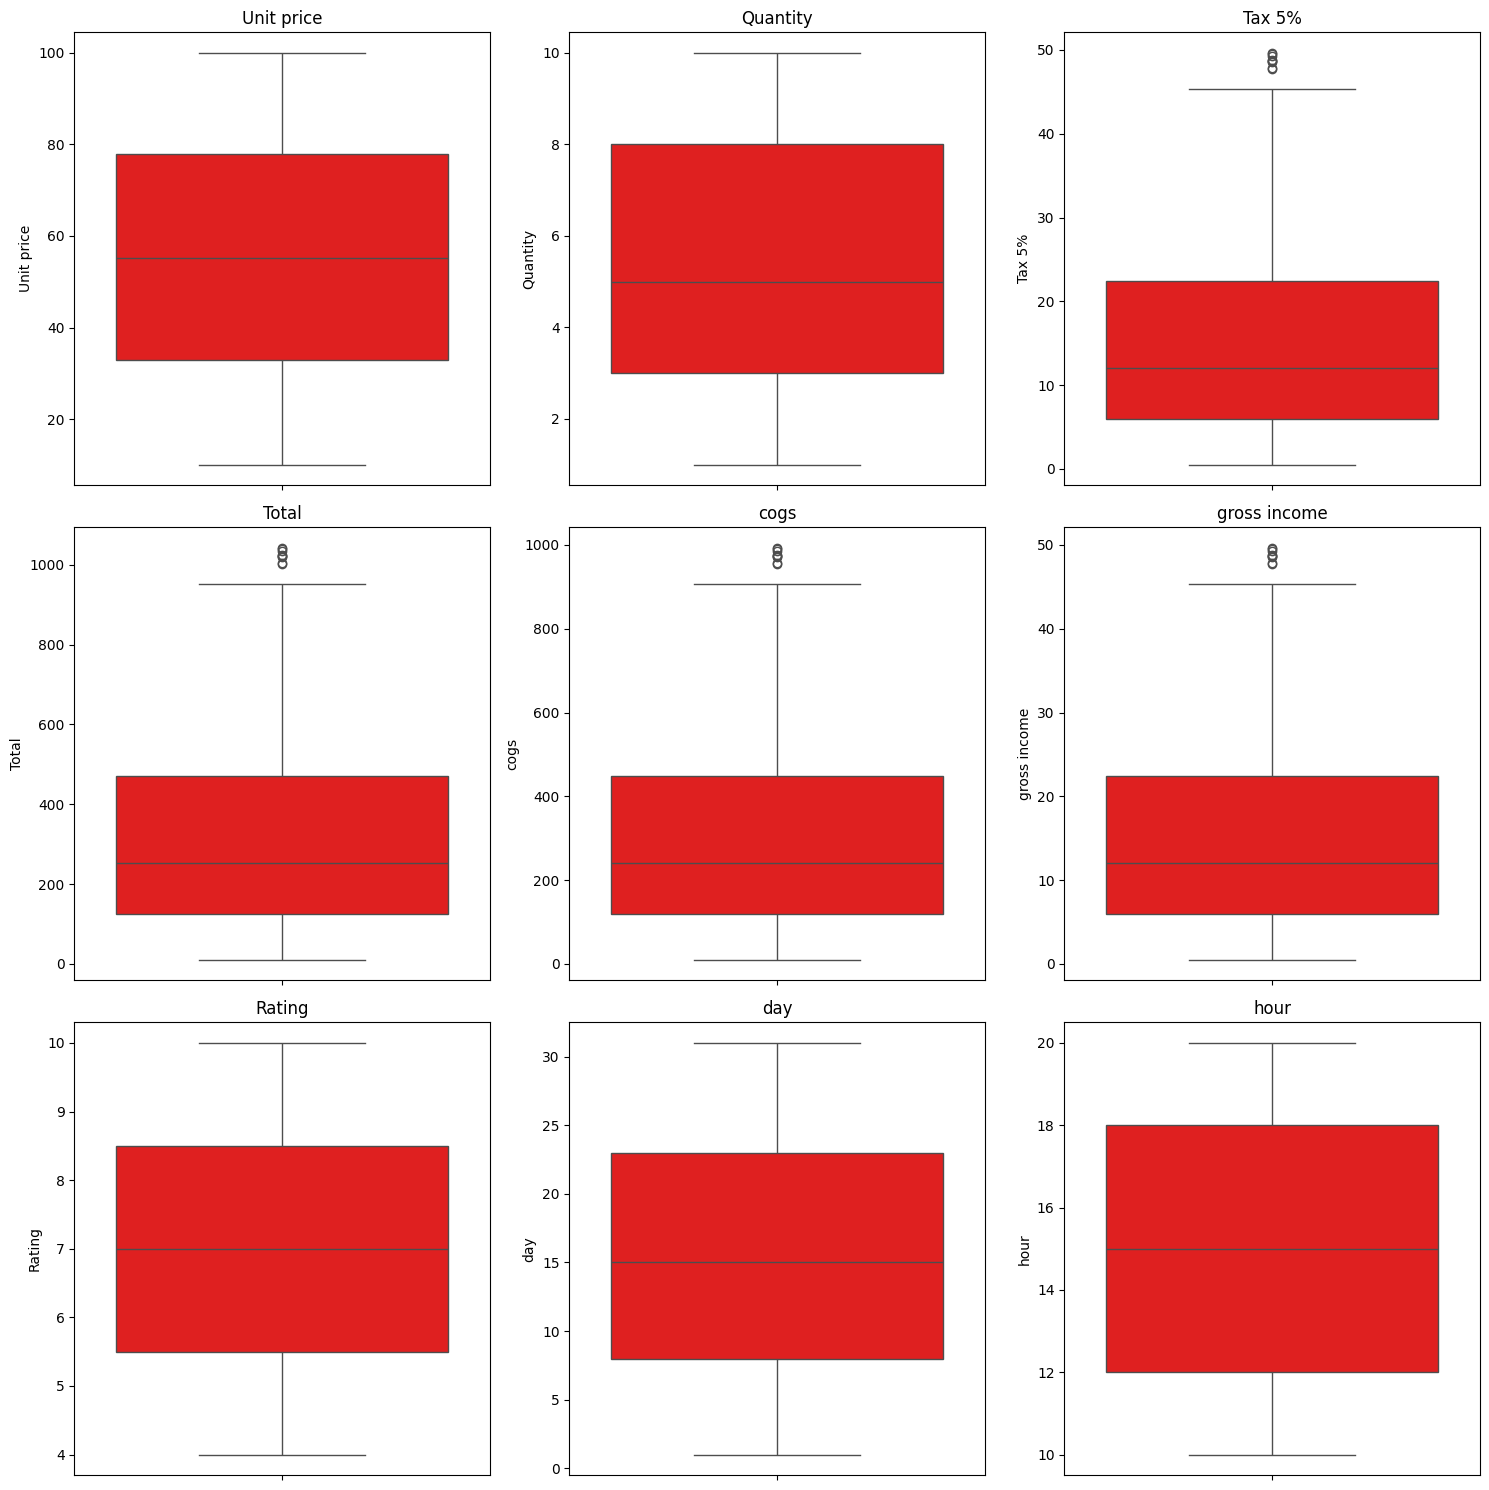

In [430]:
# Calculate the number of rows and columns for the subplots grid
num_rows = int(np.ceil(len(num_col) / 3))  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows)) # Create subplots with calculated rows

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(num_col):
  sns.boxplot(df[col], ax=axes[i] , color='Red')  # Plot on the corresponding subplot
  axes[i].set_title(col)  # Set title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [431]:
# no major outliers


## **Encoding categorical data**

In [432]:
df[cat_cols].columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'day_of_week', 'month'],
      dtype='object')

In [433]:
label_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'month', 'day_of_week']
le = LabelEncoder()
df[label_cols] = df[label_cols].apply(le.fit_transform)

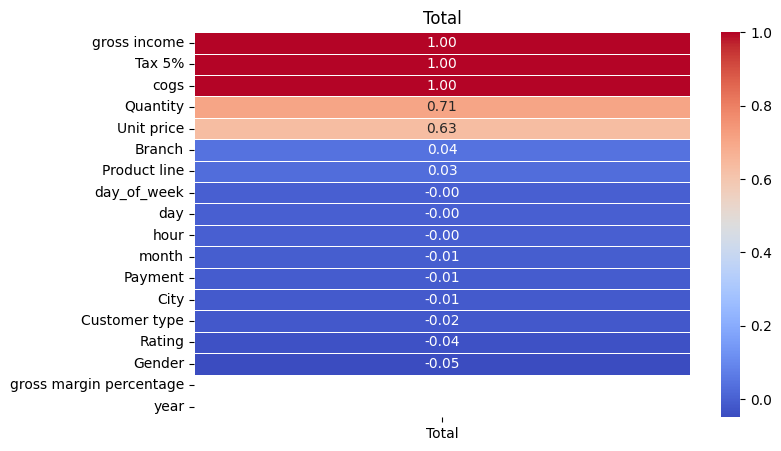

In [434]:
correlation_matrix = df.corr(numeric_only=True)
correlation_price = correlation_matrix['Total'].sort_values(ascending=False).drop('Total')
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Total')
plt.show()

## **Models**

In [435]:
X = df.drop('Total', axis=1)
y = df['Total']

In [436]:
anova_selector = SelectKBest(score_func=f_regression , k='all')
anova_selector.fit(X, y)
anova_scores = pd.Series(anova_selector.scores_, index=X.columns)
selected_features = anova_scores.sort_values(ascending=False).index[:9]
print("ANOVA Scores:")
print(anova_scores.sort_values(ascending=False))
print("\nSelected Features Based on Anova:\n", selected_features )

ANOVA Scores:
cogs                       1.797693e+308
gross income                2.247296e+18
Tax 5%                      2.247296e+18
Quantity                    9.890370e+02
Unit price                  6.706394e+02
Gender                      2.446492e+00
Branch                      1.684297e+00
Rating                      1.327104e+00
Product line                9.988692e-01
Customer type               3.862957e-01
City                        1.638442e-01
Payment                     1.543100e-01
month                       4.512655e-02
hour                        7.660046e-03
day                         6.311457e-03
day_of_week                 4.039811e-03
gross margin percentage     0.000000e+00
year                        0.000000e+00
dtype: float64

Selected Features Based on Anova:
 Index(['cogs', 'gross income', 'Tax 5%', 'Quantity', 'Unit price', 'Gender',
       'Branch', 'Rating', 'Product line'],
      dtype='object')


In [437]:
X_selected = df[selected_features]
y_selected = df['Total']

In [438]:
standard_scaler = StandardScaler()
X_selected = standard_scaler.fit_transform(X_selected)

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

In [440]:
model_KNN = KNeighborsRegressor()
model_KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [441]:
y_pred_KNN = model_KNN.predict(X_test)

In [442]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

RandomForestRegressor()

In [443]:
y_pred_RF = model_RF.predict(X_test)

In [444]:
model_SVR = SVR()
model_SVR.fit(X_train, y_train)

SVR()

In [445]:
y_pred_SVR = model_SVR.predict(X_test)

In [446]:
model_Gradient = GradientBoostingRegressor()
model_Gradient.fit(X_train, y_train)

GradientBoostingRegressor()

In [447]:
y_pred_Gradient = model_Gradient.predict(X_test)

In [448]:
model_Hist = HistGradientBoostingRegressor()
model_Hist.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [449]:
y_pred_Hist = model_Hist.predict(X_test)

In [450]:
def evaluate_model(y_test, y_pred):
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

In [451]:
for model in [model_KNN, model_RF, model_SVR, model_Gradient, model_Hist]:
        y_pred = model.predict(X_test)
        print(f"Model: {model.__class__.__name__}")
        print(f"R2 Score: {r2_score(y_test, y_pred)}")
        print(f"MSE: {mean_squared_error(y_test, y_pred)}")
        print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
        print(f"{'-'*50}")

Model: KNeighborsRegressor
R2 Score: 0.9786834305931115
MSE: 1386.8348241762005
RMSE: 37.2402312583609
--------------------------------------------------
Model: RandomForestRegressor
R2 Score: 0.9999810232086224
MSE: 1.2346111905356119
RMSE: 1.111130591125819
--------------------------------------------------
Model: SVR
R2 Score: 0.3384986116132024
MSE: 43036.62302055309
RMSE: 207.45270068271728
--------------------------------------------------
Model: GradientBoostingRegressor
R2 Score: 0.9999261114680938
MSE: 4.807114465688025
RMSE: 2.1925132760574164
--------------------------------------------------
Model: HistGradientBoostingRegressor
R2 Score: 0.99957728503357
MSE: 27.50141568070766
RMSE: 5.244179218972942
--------------------------------------------------


In [452]:
results = []
for model in [model_KNN, model_RF, model_SVR, model_Gradient, model_Hist]:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        'Model': model.__class__.__name__,
        'Train Score %': f"{r2_score(y_train, y_train_pred) * 100:.2f}",
        'Test Score %': f"{r2_score(y_test, y_test_pred) * 100:.2f}"
    })


results_df = pd.DataFrame(results)
styled_df = results_df.style.set_properties(**{'background-color': '#228B22' ,'color':'Black','border-color': 'black'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "Black")]}
])

,Model,Train Score %,Test Score %
0,KNeighborsRegressor,98.45,97.87
1,RandomForestRegressor,100.00,100.00
2,SVR,37.99,33.85
3,GradientBoostingRegressor,100.00,99.99
4,HistGradientBoostingRegressor,99.97,99.96
